In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pyMELTScalc as M

sys.path.append(r'G:\My Drive\2022\GitHub\pyMELTScalc\MELTS')

import time
import random

In [2]:
M.__version__

'0.0.7'

In [3]:
Data = pd.read_excel('AzoresDataset\Azores.xlsx')
Loc = Data['LOCATION'].str.split(pat = "/")

In [4]:
Azores = pd.DataFrame(np.zeros((len(Data['LOCATION']), 11)), columns = ['Location', 'Stage', 'SiO2', 'TiO2', 'Al2O3', 
                                                                     'FeOt', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5'])

for i in range(len(Azores['SiO2'])):
    Azores['Location'].loc[i] = Loc[i][1]
    if len(Loc[i])>2:
        Azores['Stage'].loc[i] = Loc[i][-1]
    
for c in Azores.columns[2:]:
    Azores[c] = Data[c] 

C:\Users\mattg\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [5]:
Azores['Location'] = Azores['Location'].str.rstrip()
Loc = ' SAO MIGUEL'

In [6]:
SM = Azores.copy()
SM = SM[SM['Location'] == Loc]

Elements = ['SiO2', 'TiO2', 'Al2O3', 'FeOt', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5']
Comp = SM[Elements][(SM['SiO2'] > 45) & (SM['SiO2']< 55)].mean()

Comp = Comp.to_dict()
Comp['MnO'] = 0.0
Comp['CO2'] = 0.0
Comp['H2O'] = 1.0
Comp = {str(key) + '_Liq': val for key, val in Comp.items()}
#Comp['Fe3Fet'] = 0.15

In [7]:
# example of performing a single calculation
P = 1000
Results = M.multi_iso_crystallise(Model = "MELTSv1.0.2", comp = Comp, Frac_solid = True, Frac_fluid = True, 
                         T_start_C = 1200, T_end_C = 750, dt_C = 5, P_path_bar = P, Fe3Fet_Liq = 0.15, find_liquidus = True)

In [8]:
Results

{'Conditions':             T_C   P_bar             h           s          v
 0   1205.700000  1000.0 -1.195626e+06  277.869625  38.477424
 1   1200.692308  1000.0 -1.196546e+06  277.246420  38.448898
 2   1195.684615  1000.0 -1.192326e+06  275.613486  38.292961
 3   1190.676923  1000.0 -1.188193e+06  274.003477  38.139648
 4   1185.669231  1000.0 -1.184153e+06  272.416946  37.989039
 ..          ...     ...           ...         ...        ...
 76   825.115385  1000.0 -2.145764e+05   43.417740   7.472470
 77   820.107692  1000.0 -1.998566e+05   40.477112   6.957424
 78   815.100000  1000.0 -1.877059e+05   38.036694   6.533067
 79   810.092308  1000.0 -1.774710e+05   35.970295   6.176127
 80   805.084615  1000.0           NaN         NaN        NaN
 
 [81 rows x 5 columns],
 'liquid1':      SiO2_Liq  TiO2_Liq  Al2O3_Liq  Cr2O3_Liq  Fe2O3_Liq   FeO_Liq   FeOt_Liq  \
 0   48.098751  3.159068  14.460759        0.0   1.703095  8.689233  10.231324   
 1   48.133578  3.172302  14.521338      

In [9]:
P = np.linspace(1000, 8000, 16)

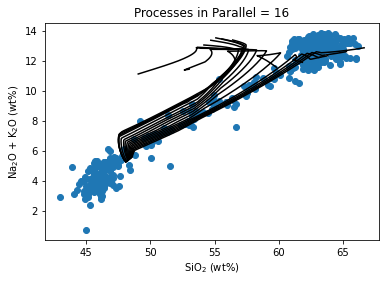

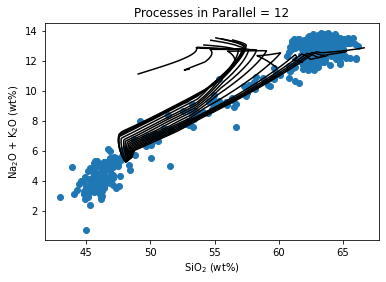

In [10]:
Core = np.array([16, 12])#, 8, 6, 4, 2, 1])
Time = np.zeros(len(Core))
for i in range(len(Core)):
    Start = time.time()
    Results = M.multi_iso_crystallise(cores = Core[i], Model = "MELTSv1.0.2", comp = Comp, Frac_solid = True, Frac_fluid = True, 
                             T_start_C = 1200, T_end_C = 750, dt_C = 2, P_path_bar = P, find_liquidus = True)
    Time[i] = time.time() - Start

    f, a = plt.subplots(1,1)
    a.plot(Azores['SiO2'][Azores['Location'] == Loc], Azores['Na2O'][Azores['Location'] == Loc] + 
          Azores['K2O'][Azores['Location'] == Loc], 'o', label = Loc)
    
    a.set_title('Processes in Parallel = ' + str(Core[i]))
    a.set_xlabel('SiO$_{2}$ (wt%)')
    a.set_ylabel('Na$_{2}$O + K$_{2}$O (wt%)')

    for R in Results:
        a.plot(Results[R]['All']['SiO2_Liq'], Results[R]['All']['Na2O_Liq'] + Results[R]['All']['K2O_Liq'], '-k')

Text(0.5, 0, 'Number of Parallel Processes')

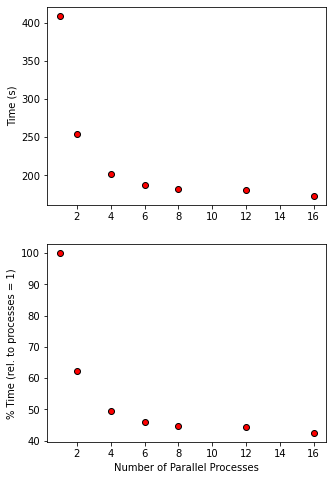

In [9]:
f, a = plt.subplots(2,1, figsize = (5, 8))
a[0].plot(Core, Time, 'ok', markerfacecolor = 'red')
a[0].set_ylabel('Time (s)')

a[1].plot(Core, 100*Time/Time[-1], 'ok', markerfacecolor = 'red')
a[1].set_ylabel('% Time (rel. to processes = 1)')
a[1].set_xlabel('Number of Parallel Processes')

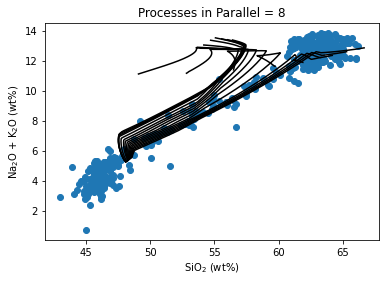

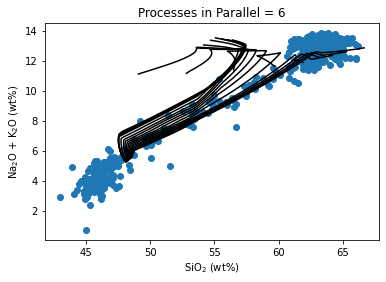

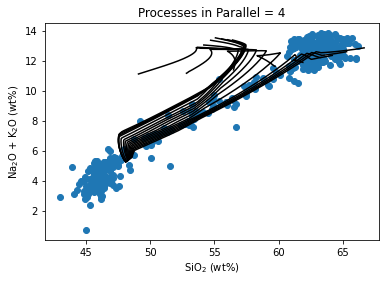

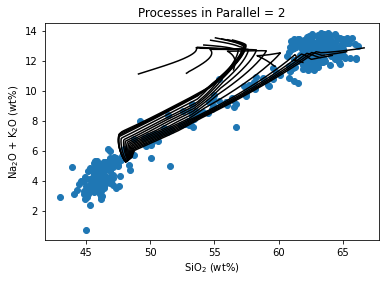

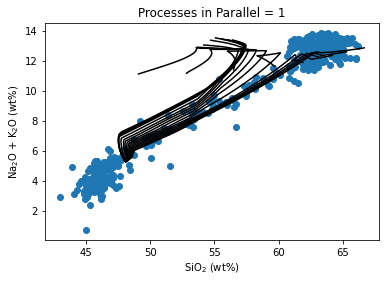

In [11]:
Core = np.array([8, 6, 4, 2, 1])
Time = np.zeros(len(Core))
for i in range(len(Core)):
    Start = time.time()
    Results = M.multi_iso_crystallise(cores = Core[i], Model = "MELTSv1.0.2", comp = Comp, Frac_solid = True, Frac_fluid = True, 
                             T_start_C = 1200, T_end_C = 750, dt_C = 2, P_bar = P, find_liquidus = True)
    Time[i] = time.time() - Start

    f, a = plt.subplots(1,1)
    a.plot(Azores['SiO2'][Azores['Location'] == Loc], Azores['Na2O'][Azores['Location'] == Loc] + 
          Azores['K2O'][Azores['Location'] == Loc], 'o', label = Loc)
    
    a.set_title('Processes in Parallel = ' + str(Core[i]))
    a.set_xlabel('SiO$_{2}$ (wt%)')
    a.set_ylabel('Na$_{2}$O + K$_{2}$O (wt%)')

    for R in Results:
        a.plot(Results[R]['All']['SiO2_Liq'], Results[R]['All']['Na2O_Liq'] + Results[R]['All']['K2O_Liq'], '-k')

Text(0.5, 0, 'Number of Parallel Processes')

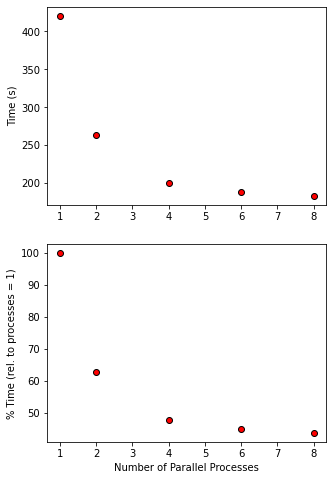

In [12]:
f, a = plt.subplots(2,1, figsize = (5, 8))
a[0].plot(Core, Time, 'ok', markerfacecolor = 'red')
a[0].set_ylabel('Time (s)')

a[1].plot(Core, 100*Time/Time[-1], 'ok', markerfacecolor = 'red')
a[1].set_ylabel('% Time (rel. to processes = 1)')
a[1].set_xlabel('Number of Parallel Processes')